<a href="https://colab.research.google.com/github/victoriaporter58/Mask_RCNN/blob/master/KNN_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-Nearest Neighbours Classification
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1WtALvyPsTTSHpsgfZ_SH8fat2WwKIMQk#scrollTo=Z89StCmHTFH6)

The KNN algorithm is simple and versatile. It assumes that similar things exist in close proximity. The objective here is to find the parameter set-up that provides the most time efficient and accuracte analysis of the MNIST dataset. To do this, the following parameters are being considered:


*   ***n_neighbours***: The number of neighbours to use.
*   ***weights***: The weight function used in prediction (uniform or distance.)
*   ***algorithm***: The algorithm used to calculate the nearest neighbours (ball_tree, kd_tree or brute.)
*   ***leaf size***: Leaf size passed to BallTree or KDTree.

**References**:
https://www.codingame.com/playgrounds/37409/handwritten-digit-recognition-using-scikit-learn, https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

##Downgrade Tensorflow
We need to downgrade tensorflow so that we can use it to import the MNIST dataset. Restart the runtime after executing this cell.

In [ ]:
pip install tensorflow==1.14

##Import the required libraries and the MNIST dataset
We prepare the dataset by splitting it into training images, training labels, testing images and testing labels.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# import and read the MNIST dataset
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('/home/server/datasets/MNIST_data/')

# set-up dataset as numpy array
# seperate the dataset into training (60,000) images & labels and testing (10,000) images & labels
train_images = np.asarray(mnist.train.images)
train_labels = np.asarray(mnist.train.labels)
test_images = np.asarray(mnist.test.images)
test_labels = np.asarray(mnist.test.labels)

##Fine-tune parameters
We want to identify the optimal k value, weights, algorithm and leaf size for the MNIST dataset.

**NOTE**: The cell below is time consuming to execute and is only used to find the optimal parameters. **Skip this cell and execute the next one to train the final model**.

In [5]:
# record the expected results for comparison with predictions
expected = test_labels.tolist()

# initialise the range of k values we are using i.e. all odd numbers (to prevent ties) between 1 and 30 inclusive
# we want to identify what k value produces the most accurate results before we handle predictions
# accuracies will record the score of each k value i.e. how many predictions the k-nn classifier got correct
kVals = range(1, 30, 2)
accuracies = []
weights = 'distance' # or 'uniform' but using distance improved the accuracy
algorithm = 'brute' # or 'kd_tree' or 'ball_tree' however brute was the most time efficient and maintained a high accuracy

print("Executing...")

# loop over the k values we have chosen
for k in range(1, 30, 2):
	# train the classifier using the current k value
	model = KNeighborsClassifier(weights=weights,n_neighbors=k, algorithm=algorithm)
	model.fit(train_images, train_labels)
 
	# check how many predictions the classifer got correct and update the accuracies list
	score = model.score(test_images, expected)
	print("k=%d, accuracy=%.2f%%" % (k, score * 100))
	accuracies.append(score)
 
# find the value of k that has the highest accuracy - this is the k value that we will use
highest_accuracy_value = int(np.argmax(accuracies))
# print the parameter set-up
print(f"Weights = {weights}")
print(f"Algorithm = {algorithm}")
print("k=%d achieved highest accuracy of %.2f%% on testing data" % (kVals[highest_accuracy_value], accuracies[highest_accuracy_value] * 100))

Executing...
k=1, accuracy=96.77%
k=3, accuracy=97.09%
k=5, accuracy=96.86%
k=7, accuracy=96.84%
k=9, accuracy=96.75%
k=11, accuracy=96.64%
k=13, accuracy=96.47%
k=15, accuracy=96.39%
k=17, accuracy=96.40%
k=19, accuracy=96.31%
k=21, accuracy=96.23%
k=23, accuracy=96.11%
k=25, accuracy=96.07%
k=27, accuracy=95.99%
k=29, accuracy=95.91%
Weights = distance
Algorithm = brute
k=3 achieved highest accuracy of 97.09% on testing data


##Train using the optimal K value
The above cell is time consuming to execute, so based on our tests, the optimal parameters for the MNIST dataset are:
* k = 3
* weights = 'uniform'
* algorithm = 'brute'


In [6]:
# set up the model using the k value we found above with the highest accuracy
model = KNeighborsClassifier(weights='distance',n_neighbors=3,algorithm='brute')

In [7]:
# train the model
model.fit(train_images, train_labels)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

##Predictions
Now that the model has been trained, we want to make predictions on the test data.

In [8]:
predictions = model.predict(test_images)

##Evaluation
Now that we have predictions, we want to visualise them.
* ***Accuracy***: The accuracy of our classifier.
* ***Classification report***: This shows us how accurate our classifier is at identifying each class.
* ***Confusion matrix***: This shows us exactly how many samples our classifier got correct/incorrect.

In [12]:
# print a classification report to show how the classifer performed on each digit
print("Accuracy: ", accuracy_score(expected, predictions), "\n")
print("Classification Report:")
print(classification_report(expected, predictions), "\n")
print("Confusion Matrix:")
print(confusion_matrix(expected, predictions))

Accuracy:  0.9709 

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.97      1.00      0.98      1135
           2       0.99      0.97      0.98      1032
           3       0.97      0.96      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.96      0.97      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.97      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000
 

Confusion Matrix:
[[ 974    1    1    0    0    1    2    1    0    0]
 [   0 1132    2    0    1    0    0    0    0    0]
 [   9    5  997    2    0    0    1   16    2    0]
 [   0    1    4  9

#Testing
This code allows us to choose an image from the testing dataset and allow our classifier to make a prediction on it.

Prediction:  9


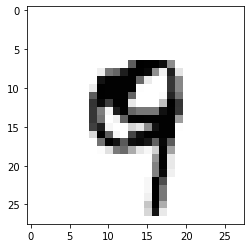

In [11]:
# select image index from test dataset
image_index = 4444

# reshape the test image so that it fits on screen
# make colourmap greyscale
plt.imshow(test_images[image_index].reshape(28, 28),cmap='Greys')

# make a prediction on the image using the classifier defined and trained above
# (1,-1) means we are using a single sample
pred = model.predict(test_images[image_index].reshape(1,-1))[0]

# print the classifier's prediction
print("Prediction: ",pred)